In [1]:
!pip install scikit-learn

  Using cached scikit_learn-0.22.2.post1-cp38-cp38-win_amd64.whl (6.6 MB)
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)


In [2]:
import sklearn as sl

## Data Loading for ML Projects

In [19]:
from pandas import read_csv

path = r"iris.csv"
data = read_csv(path)
print(data.shape)
print(data[:10])
print(type(data))

(150, 5)
     A    B    C    D  labels
0  5.1  3.5  1.4  0.2  Setosa
1  4.9  3.0  1.4  0.2  Setosa
2  4.7  3.2  1.3  0.2  Setosa
3  4.6  3.1  1.5  0.2  Setosa
4  5.0  3.6  1.4  0.2  Setosa
5  5.4  3.9  1.7  0.4  Setosa
6  4.6  3.4  1.4  0.3  Setosa
7  5.0  3.4  1.5  0.2  Setosa
8  4.4  2.9  1.4  0.2  Setosa
9  4.9  3.1  1.5  0.1  Setosa
<class 'pandas.core.frame.DataFrame'>


In [7]:
print(data.describe())

                A           B           C           D
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       150 non-null    float64
 1   B       150 non-null    float64
 2   C       150 non-null    float64
 3   D       150 non-null    float64
 4   labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
count_class = data.groupby('labels').size()
print(count_class)

labels
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


In [10]:
correlations = data.corr(method='pearson')
print(correlations)

          A         B         C         D
A  1.000000 -0.117570  0.871754  0.817941
B -0.117570  1.000000 -0.428440 -0.366126
C  0.871754 -0.428440  1.000000  0.962865
D  0.817941 -0.366126  0.962865  1.000000


## Understanding Data with Visualization

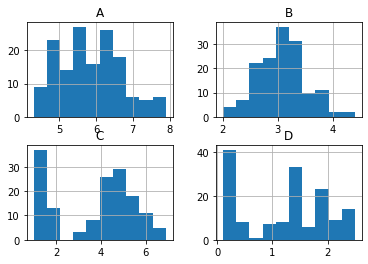

In [11]:
from matplotlib import pyplot
from pandas import read_csv
path = r"iris.csv"
data = read_csv(path)
data.hist()
pyplot.show()

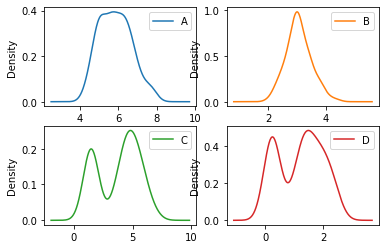

In [12]:
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
pyplot.show()

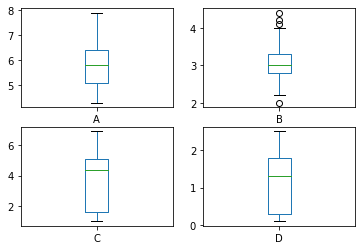

In [13]:
data.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False,sharey = False)
pyplot.show()

## preprocessing

In [20]:
data

,A,B,C,D,labels
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
data['labels'] = label_encoder.fit_transform(data['labels']) #string labels to int lables
data

,A,B,C,D,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(data)
data_rescaled 

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 0.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 0.        ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667, 0.        ],
       [0.13888889, 0.41666667, 0.06779661, 0.        , 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        , 0.        ],
       [0.41666667, 0.83333333, 0.

In [26]:
from sklearn.preprocessing import normalize

ardata=normalize(data_rescaled,norm='l2',axis=0)
ardata

array([[0.03732251, 0.10714286, 0.00998345, 0.00611018, 0.        ],
       [0.02799188, 0.07142857, 0.00998345, 0.00611018, 0.        ],
       [0.01866126, 0.08571429, 0.00748759, 0.00611018, 0.        ],
       [0.01399594, 0.07857143, 0.01247931, 0.00611018, 0.        ],
       [0.0326572 , 0.11428571, 0.00998345, 0.00611018, 0.        ],
       [0.05131845, 0.13571429, 0.01747103, 0.01833055, 0.        ],
       [0.01399594, 0.1       , 0.00998345, 0.01222036, 0.        ],
       [0.0326572 , 0.1       , 0.01247931, 0.00611018, 0.        ],
       [0.00466531, 0.06428571, 0.00998345, 0.00611018, 0.        ],
       [0.02799188, 0.07857143, 0.01247931, 0.        , 0.        ],
       [0.05131845, 0.12142857, 0.01247931, 0.00611018, 0.        ],
       [0.02332657, 0.1       , 0.01497517, 0.00611018, 0.        ],
       [0.02332657, 0.07142857, 0.00998345, 0.        , 0.        ],
       [0.        , 0.07142857, 0.00249586, 0.        , 0.        ],
       [0.06997971, 0.14285714, 0.

## Feature selection

In [27]:
data

,A,B,C,D,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

In [33]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [34]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,
from sklearn.feature_selection import chi2

X, y = load_iris(return_X_y=True)
print(X.shape)



(150, 4)


In [35]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 2)


In [36]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


(150, 3)

In [37]:
X_new

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

## Modeling

In [44]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
label_names = data['target_names']
print(label_names)

['malignant' 'benign']


In [47]:
labels = data['target']
features = data['data']

In [48]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(
    features,labels,test_size = 0.40, random_state = 42)

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(train, train_labels)



In [50]:
preds = model.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [52]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report


In [53]:
print(accuracy_score(test_labels,preds))


0.9517543859649122


In [54]:
ACC=accuracy_score(test_labels,preds)
MAE=mean_squared_error(test_labels,preds)
CM=confusion_matrix(test_labels,preds)
CR=classification_report(test_labels,preds)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))


ACC=0.9517543859649122 
 MAE  =0.04824561403508772 
 confusion_matrix=
[[ 73   7]
 [  4 144]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        80
           1       0.95      0.97      0.96       148

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



In [55]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(train, train_labels)


In [56]:
preds = clf.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [57]:
ACC=accuracy_score(test_labels,preds)
MAE=mean_squared_error(test_labels,preds)
CM=confusion_matrix(test_labels,preds)
CR=classification_report(test_labels,preds)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))


ACC=0.9342105263157895 
 MAE  =0.06578947368421052 
 confusion_matrix=
[[ 73   7]
 [  8 140]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        80
           1       0.95      0.95      0.95       148

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



In [58]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
preds = classifier.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [60]:
ACC=accuracy_score(test_labels,preds)
MAE=mean_squared_error(test_labels,preds)
CM=confusion_matrix(test_labels,preds)
CR=classification_report(test_labels,preds)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))


ACC=0.9692982456140351 
 MAE  =0.03070175438596491 
 confusion_matrix=
[[ 76   4]
 [  3 145]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        80
           1       0.97      0.98      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



## clustering

In [61]:
from sklearn.cluster import KMeans


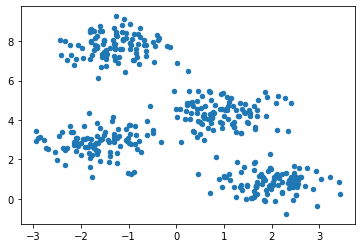

In [62]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
centers

array([[-1.2689694 ,  7.75608144],
       [ 0.95041055,  4.36874542],
       [ 1.95662677,  0.83945671],
       [-1.61366997,  2.84849883]])

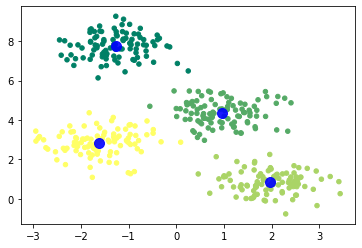

In [64]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 20, cmap = 'summer')
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

In [65]:
from sklearn.cluster import MeanShift

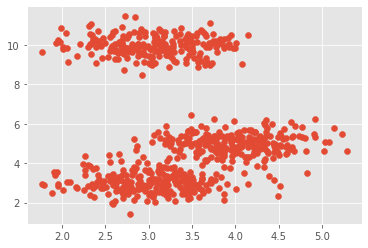

In [66]:
from matplotlib import style

style.use("ggplot")
from sklearn.datasets.samples_generator import make_blobs
centers = [[3,3,3],[4,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 700, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

[[3.00106885 3.01356599 2.95830421]
 [3.04976431 9.96082956 9.95418385]
 [3.96929383 5.01511525 4.97274643]]
Estimated clusters: 3


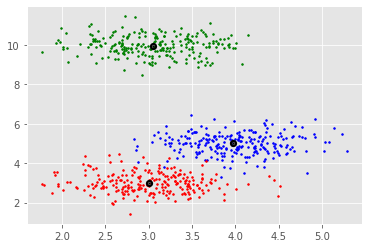

In [68]:
import numpy as np
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
   marker = ".",color = 'k', s = 20, linewidths = 5, zorder = 10)
plt.show()

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList, 
   distance_sort ='descending',show_leaf_counts = True)
plt.show()

IndexError: range object index out of range

<Figure size 720x504 with 0 Axes>

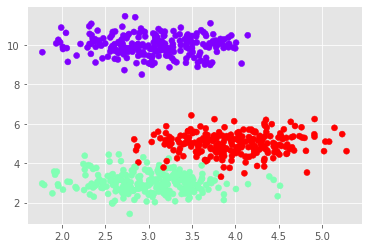

In [73]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')
